In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

# 1- Volatility

$\sigma_{t_{i}^{n}} = c + (\sigma_{0} - c) exp( - \lambda t_{i}) + \gamma \sum_{j=1}^{i} exp(-\lambda (t_{i}-t_{j-1})) (W_{t_{j}} - W_{t_{j-1}}) $

In [2]:
M=1000
n=1000
T=2
sigma_0=0.2
lambd = 2
c = 0.4
gamma = 0.3
pas = T/n
times=np.linspace(0,T,n)
echantillon_2=np.random.normal(0,np.sqrt(pas), size=(M,n-1)) # dW = W_t_j - W_t_(j-1)
sigmas = c + (sigma_0 - c)*np.exp(-lambd*times[1:])+ gamma*np.cumsum(np.exp(-lambd*times[:-1])*echantillon_2, axis=1)
sigmas=np.hstack((np.array([np.array([sigma_0]*M)]).T,sigmas))

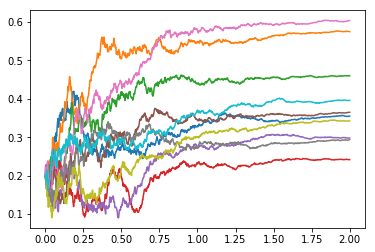

In [3]:
for i in range(0,M,100):
    plt.plot(times,sigmas[i])
plt.show()

## comment :
we can observe that the volatility becomes stationary from a certain moment and always go back to its long-term mean which is well linked to the rhythm of evolution $\lambda$ that confirme that $\sigma_{t}$ is clearly an OU process

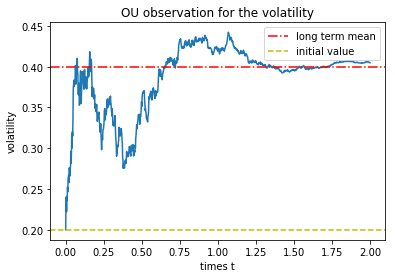

In [172]:
plt.plot(times,sigmas[341])
plt.axhline(c,linestyle='-.', color = 'r', label = "long term mean" )
plt.axhline(sigma_0,linestyle='--',color = 'y', label = "initial value")
plt.xlabel("times t")
plt.ylabel("volatility")
plt.title("OU observation for the volatility")
plt.legend(loc='best')
plt.show()

# 2- Risky asset price

In [4]:
M=1000
T=2
S_0 = 100
sigma_0=0.2
lambd = 2
c = 0.4
gamma = 0.3
pas = T/n
times=np.linspace(0,T,n)
echantillon_1=np.random.normal(0,np.sqrt(pas), size=(M,n-1)) # dW = W_t_j - W_t_(j-1)
S = S_0*np.exp(np.cumsum(-0.5*pas*sigmas[:,:-1]**2+sigmas[:,:-1]*echantillon_1, axis=1))
S=np.hstack((np.array([np.array([S_0]*M)]).T,S))

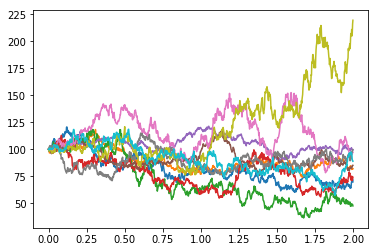

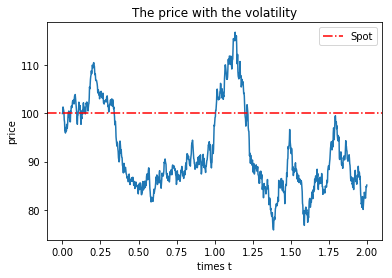

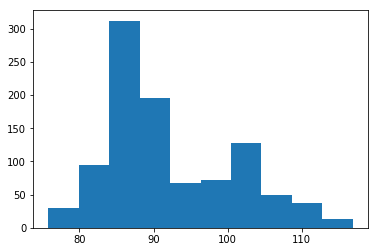

In [191]:
for i in range(0,M,100):
    plt.plot(times,S[i])
plt.show()

plt.plot(times,S[M//2])
plt.axhline(S_0,linestyle='-.', color = 'r', label = "Spot" )
plt.xlabel("times t")
plt.ylabel("price")
plt.title("The price with the volatility")
plt.legend(loc='best')
plt.show()
plt.hist(S[M//2])
plt.show()

# comment:
when we look at the histogram, during period T that the tendancy of the price is under S_0 according to the volatility

# 3- profit and loss

In [7]:
def d(s,k,v):
    return np.log(s/k)/np.sqrt(v) + np.sqrt(v)
def gauss(x):
    return np.exp(-0.5*x**2)/(np.sqrt(2*np.pi))
def Gamma(S,K,T,r,SiG):
    return gauss(d(S,K*np.exp(-r*T),T*SiG**2))/(S*SiG*np.sqrt(T))

In [12]:
# données
M=1000
T=2
sigma_0=0.2
lambd = 2
c = 0.4
gamma = 0.3
S_0 = 100
r=0.02

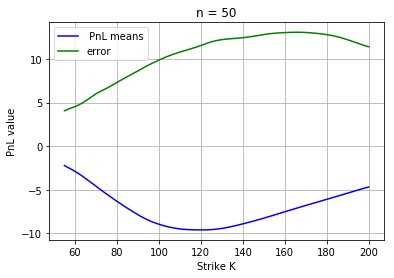

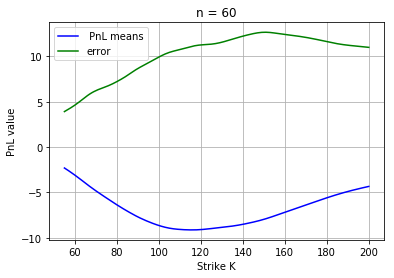

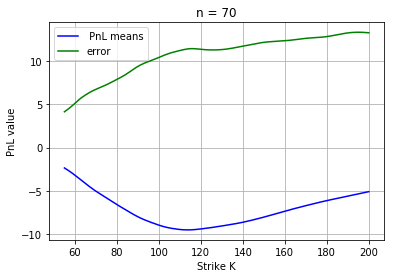

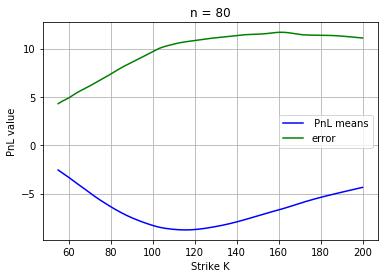

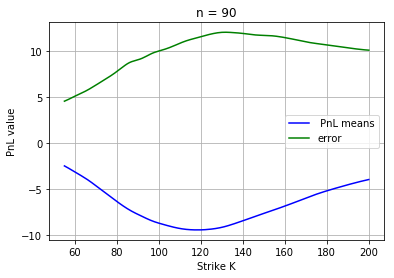

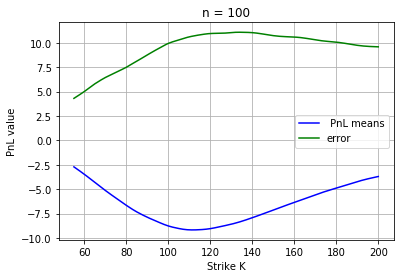

In [13]:
for n in range(50,101,10):
    pas = T/n
    times=np.linspace(0,T,n)
    
    # la volatilité
    echantillon_2=np.random.normal(0,np.sqrt(pas), size=(M,n-1)) # dW = W_t_j - W_t_(j-1)
    sigmas = c + (sigma_0 - c)*np.exp(-lambd*times[1:]) + gamma*np.cumsum(np.exp(-lambd*times[:-1])*echantillon_2, axis=1)
    sigmas=np.hstack((np.array([np.array([sigma_0]*M)]).T,sigmas))
    
    # le risky asset price
    echantillon_1=np.random.normal(0,np.sqrt(pas), size=(M,n-1)) # dW = W_t_j - W_t_(j-1)
    S = S_0*np.exp(np.cumsum(-0.5*pas*sigmas[:,:-1]**2+sigmas[:,:-1]*echantillon_1, axis=1))
    S=np.hstack((np.array([np.array([S_0]*M)]).T,S))
    
    # pour les moyennes
    meansPnL=[]
    varPnL=[]
    
    # ensemble de strike
    Ks=range(55,201,1)
    
    for k in Ks:
        PLs = 0.5*pas*(np.exp(r*(T-times[:-1]))*(sigma_0**2 - sigmas[:,:-1]**2))*(S[:,:-1]**2)*Gamma(S[:,:-1],k,T-times[:-1],r,sigma_0)
        PnL = PLs.sum(axis=1)
        meansPnL.append(np.mean(PnL))
        varPnL.append(np.sqrt(np.var(PnL)))
    plt.plot(Ks,meansPnL, color = 'b', label = " PnL means")
    plt.plot(Ks,varPnL, color ='g', label = "error")
    plt.xlabel("Strike K")
    plt.ylabel("PnL value")
    plt.title("n = "+ str(n))
    plt.legend()
    plt.grid()
    plt.show()